In [6]:
import kagglehub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import random

In [2]:
print("Downloading dataset...")
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")
print(f"Dataset downloaded to: {path}")

Using Colab cache for faster access to the 'brain-tumor-mri-dataset' dataset.
Dataset downloaded to: /kaggle/input/brain-tumor-mri-dataset


In [3]:
train_path = os.path.join(path, 'Training')
test_path = os.path.join(path, 'Testing')
img_size = 150
batch_size = 32
epochs = 20

In [4]:

train_data = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=15
)

test_data = ImageDataGenerator(rescale=1./255)

train_images = train_data.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_images = train_data.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_images = test_data.flow_from_directory(
    test_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

print(f"\nFound {len(train_images.class_indices)} classes: {list(train_images.class_indices.keys())}")
print(f"Training images: {train_images.samples}")
print(f"Validation images: {val_images.samples}")
print(f"Test images: {test_images.samples}")


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.

Found 4 classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Training images: 4571
Validation images: 1141
Test images: 1311


In [5]:
model = keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_images.class_indices), activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel structure:")
model.summary()


Model structure:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("\nStarting training...")
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=epochs
)


Starting training...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.5306 - loss: 1.0738 - val_accuracy: 0.7038 - val_loss: 0.8698
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.7802 - loss: 0.5504 - val_accuracy: 0.7020 - val_loss: 0.9060
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.8209 - loss: 0.4662 - val_accuracy: 0.7818 - val_loss: 0.5938
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.8585 - loss: 0.3721 - val_accuracy: 0.7774 - val_loss: 0.5902
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.8622 - loss: 0.3489 - val_accuracy: 0.8133 - val_loss: 0.5341
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.8803 - loss: 0.3116 - val_accuracy: 0.7975 - val_loss: 0.5322
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.8868 - loss: 0.2961 - val_accuracy: 0.8011 - val_loss: 0.5645
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.9013 - loss: 0.2638 - val_accu

In [ ]:
print("\nTesting the model...")
test_loss, test_acc = model.evaluate(test_images)
print(f"Test accuracy: {test_acc*100:.2f}%")


Testing the model...
41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 424ms/step - accuracy: 0.9141 - loss: 0.3465
Test accuracy: 90.69%


In [ ]:
model.save('brain_tumor_model.keras')
print("\nModel saved as 'brain_tumor_model.keras'")


Model saved as 'brain_tumor_model.keras'


In [ ]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

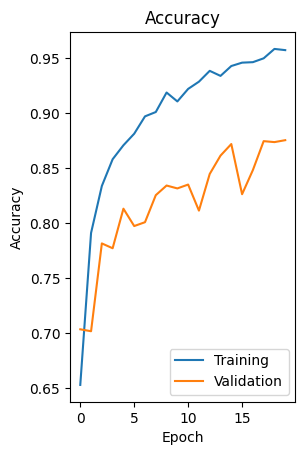

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

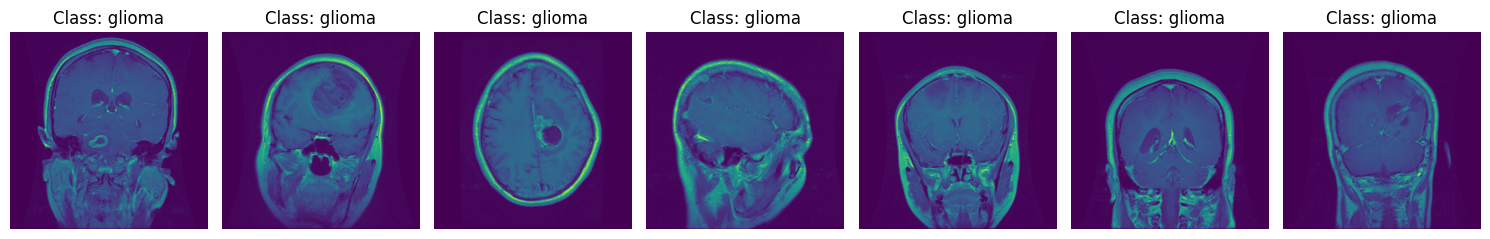

In [7]:
def display_random_image_from_class(base_path, class_name, num_images=1):
    class_path = os.path.join(base_path, class_name)
    if not os.path.exists(class_path):
        print(f"Class path not found: {class_path}")
        return

    images = os.listdir(class_path)
    if not images:
        print(f"No images found in {class_path}")
        return

    num_images_to_display = min(num_images, len(images))

    plt.figure(figsize=(15, 5))
    for i in range(num_images_to_display):
        random_image_name = random.choice(images)
        random_image_path = os.path.join(class_path, random_image_name)

        plt.subplot(1, num_images_to_display, i + 1)
        img = plt.imread(random_image_path)
        plt.imshow(img)
        plt.title(f"Class: {class_name}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

class_to_display = 'glioma'
display_random_image_from_class(train_path, class_to_display, num_images=7)